https://bit.ly/2KM7Use

In [1]:
#First Import all the necessary libraries required
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D
from keras.layers import MaxPooling2D, ZeroPadding2D

from keras.layers.core import Activation
from keras import backend as K
from keras.utils import np_utils
np.random.seed(25)

Using TensorFlow backend.


In [2]:
#Load MNIST dataset provided by Keras.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11493376/11490434 [==============================] - 3s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


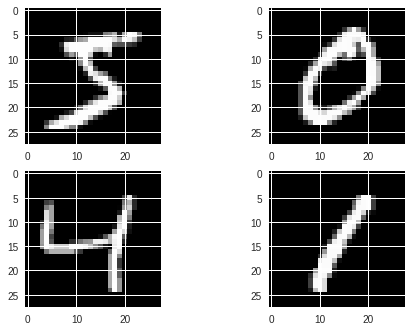

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
# X_train original shape is (60000, 28, 28). CNN with tensorflow accepts format of (batch, height, width, channels)
# so Reshaping training set. 
# Image is in gray scale, so number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).
# Data loading + reshape to 4D
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [5]:
# Applying one-hot encoding to the labels
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
#create the model that will classify the images
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [0]:
# cross-entropy loss calculates the error rate
# Adam optimizer is responsible for updating the weights of the neurons via backpropagation

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Training Model

model.fit(X_train, Y_train, batch_size=200, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.4027 - acc: 0.8769 - val_loss: 0.0829 - val_acc: 0.9746
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0943 - acc: 0.9706 - val_loss: 0.0490 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0688 - acc: 0.9786 - val_loss: 0.0421 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0544 - acc: 0.9825 - val_loss: 0.0383 - val_acc: 0.9871
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0476 - acc: 0.9851 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0409 - acc: 0.9875 - val_loss: 0.0313 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.0380 - acc: 0.9874 - val_loss: 0.0309 - val_ac

In [10]:
#Evaluate with test data
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 93us/step

Test accuracy:  0.9918


In [11]:
# saving the model
save_dir = "/content/datalab/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
print (os.listdir('/content/datalab'))

Saved trained model at /content/datalab/keras_mnist.h5 
['.config', 'keras_mnist.h5']



9918  classified correctly
82  classified incorrectly


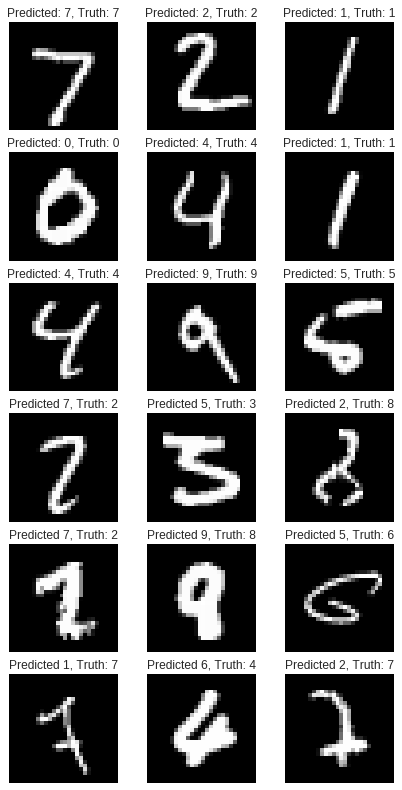

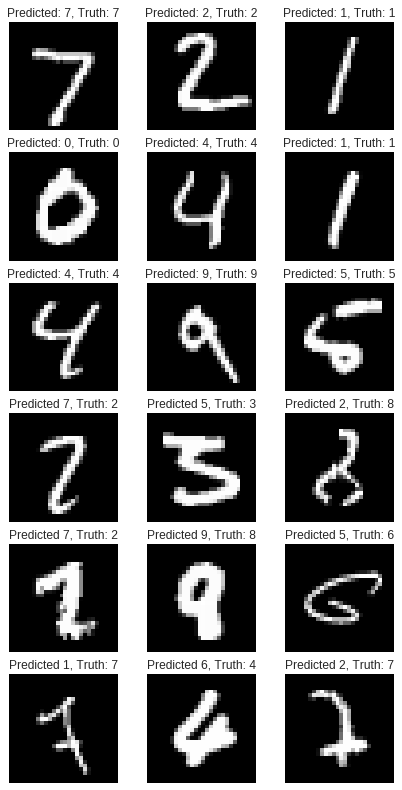

In [12]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation